# DO NOT RUN THIS NOTEBOOK

Otherwise you will lose the visualization since the data is not saved in the repository.
The functions are not documented here as they are tailored to the specific experiments that were run.

We provide this notebook as an example of how to visualize the results of the rho model estimation.

See the example notebook `tests/example_rho_model_visualization.ipynb` for more details on how to create your own visualization.

In [26]:
import os

import numpy as np 
import matplotlib.pyplot as plt
import scipy

%matplotlib inline

In [27]:
def get_conf_int(mat, confidence_level=0.95, method="exact", p=0.5):
    """
    Assume as many biases as classes.
    mat(i,j) is the number of images with bias j that where generated with the class conditionning i.
    Args:
        mat: 2D numpy array of shape (n_classes, n_classes)
    """
    nb_aligned = int(np.trace(mat))
    nb_total = int(np.sum(mat))
    res = scipy.stats.binomtest(k=nb_aligned, n=nb_total, p = p)
    est_rho = nb_aligned / nb_total
    conf_int = res.proportion_ci(confidence_level=confidence_level, method=method)
    return est_rho, (conf_int.low, conf_int.high)

In [28]:
def get_all_conf_int(run_mats, key_ordered, num_classes=None, confidence_level=0.95, method="exact", p=0.5):
    if num_classes is None:
        num_classes = len(run_mats[0])-1
    all_rhos = []
    all_conf_ints = []
    for k in key_ordered :
        mat = run_mats[k]
        rho, conf_int = get_conf_int(mat[:num_classes][:num_classes], confidence_level=confidence_level, method=method, p=p)
        all_rhos.append(rho)
        all_conf_ints.append(conf_int)
    return np.array(all_rhos), np.array(all_conf_ints)

In [29]:
def get_nstep_schurn(file_name):
    if isinstance(file_name, list):
        return [get_nstep_schurn(f) for f in file_name]
    split_on_underscore = file_name.split("_")
    return (
        ("n_steps", int(split_on_underscore[3].split("=")[1])),
        ("s_churn", int(split_on_underscore[5].split(".")[0].split("=")[1])),
    )

def repr_tuple(tup):
    s =",".join([f"{k}={v}" for k,v in tup])
    return s

In [30]:
color_map = {
    (("n_steps", 6), ("s_churn", 0)) : "blue",
    (("n_steps", 160), ("s_churn", 0)) : "green",
    (("n_steps", 6), ("s_churn", 60)) : "orange",
    (("n_steps", 160), ("s_churn", 60)) : "red",
}

## Normal model, 10 classes

In [ ]:
root_dir_10classes = ...
matrix_files = ... 
run_names = ...
rho_list_10cl = [0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.95,0.99,0.995,0.999]
run_dict_10cl = {k:v for k,v in zip(rho_list_10cl, run_names)}
num_rhos = len(rho_list_10cl)
num_classes = 10

In [32]:
run_mat_10cl = {get_nstep_schurn(mfile) : {rho:np.loadtxt(os.path.join(root_dir_10classes, dirname,mfile), delimiter=',') 
                for rho,dirname 
                in run_dict_10cl.items()}
                for mfile in matrix_files}

In [33]:
rho_per_rhodata_10cl = {}
rho_per_rhodata_conf_int_10cl = {}
for k,mats in run_mat_10cl.items():
    rho_per_rhodata_10cl[k], rho_per_rhodata_conf_int_10cl[k] = get_all_conf_int(mats, rho_list_10cl, num_classes=num_classes)

rho model vs rho dataset (BiasedMNIST 10 classes)


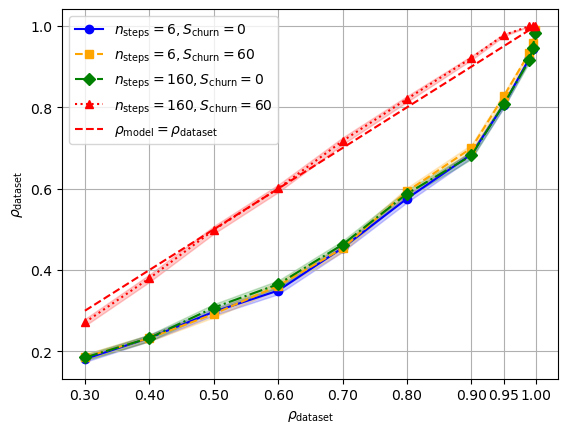

In [ ]:
plot_last = len(rho_list_10cl)
markers = ['o', 's', 'D', '^']
linestyles = ['-', '--', '-.', ':']
for i, ((k, rhos), (_, conf_ints)) in enumerate(zip(rho_per_rhodata_10cl.items(), rho_per_rhodata_conf_int_10cl.items())):
    color = color_map[k]
    plt.fill_between(rho_list_10cl[-plot_last:], conf_ints[:,0][-plot_last:], conf_ints[:,1][-plot_last:], alpha=0.2, color=color)
    label_ = r"$n_\text{steps}=" + str(k[0][1]) + r", S_\text{churn}=" + str(k[1][1]) + "$"
    plt.plot(rho_list_10cl[-plot_last:], rhos[-plot_last:], marker=markers[i], linestyle=linestyles[i], color=color, label=label_)
plt.xlabel(r"$\rho_\text{dataset}$")
plt.ylabel(r"$\rho_\text{dataset}$")
X = np.linspace(min(rho_list_10cl[-plot_last:]), 1.0, 100)
plt.plot(X, X, 'r--', label=r"$\rho_\text{model}=\rho_\text{dataset}$")
plt.grid()
cust_xticks = rho_list_10cl[:-3] + [1.]
plt.xticks(cust_xticks, rotation=0)
plt.legend()
print("rho model vs rho dataset (BiasedMNIST 10 classes)")
plt.savefig(..., bbox_inches='tight', dpi=300, format='pdf')
plt.show()

rho model vs rho dataset (BiasedMNIST 10 classes)


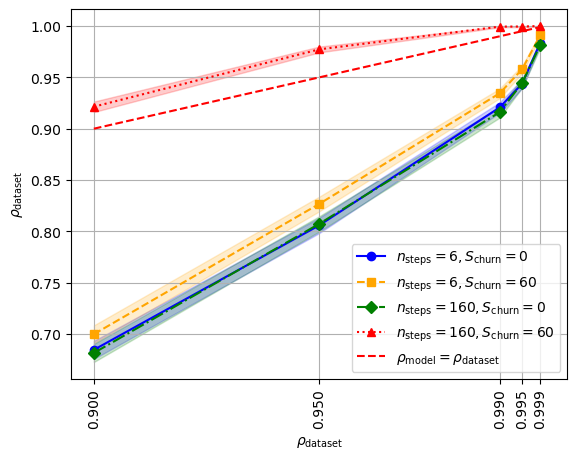

In [ ]:
plot_last = 5
markers = ['o', 's', 'D', '^']
linestyles = ['-', '--', '-.', ':']
for i, ((k, rhos), (_, conf_ints)) in enumerate(zip(rho_per_rhodata_10cl.items(), rho_per_rhodata_conf_int_10cl.items())):
    color = color_map[k]
    plt.fill_between(rho_list_10cl[-plot_last:], conf_ints[:,0][-plot_last:], conf_ints[:,1][-plot_last:], alpha=0.2, color=color)
    label_ = r"$n_\text{steps}=" + str(k[0][1]) + r", S_\text{churn}=" + str(k[1][1]) + "$"
    plt.plot(rho_list_10cl[-plot_last:], rhos[-plot_last:], marker=markers[i], linestyle=linestyles[i], color=color, label=label_)
plt.xlabel(r"$\rho_\text{dataset}$")
plt.ylabel(r"$\rho_\text{dataset}$")
X = np.linspace(min(rho_list_10cl[-plot_last:]), 1.0, 100)
plt.plot(X, X, 'r--', label=r"$\rho_\text{model}=\rho_\text{dataset}$")
plt.grid()
plt.xticks(rho_list_10cl[-plot_last:], rotation=90)
plt.legend()
print("rho model vs rho dataset (BiasedMNIST 10 classes)")
plt.savefig(..., bbox_inches='tight', dpi=300, format='pdf')
plt.show()

In [36]:
run_mat_10cl[("n_steps",6),("s_churn",0)][0.99][:num_classes].sum()

10880.0

In [37]:
rho_per_rhodata_10cl

{(('n_steps', 6),
  ('s_churn',
   0)): array([0.18134191, 0.23318015, 0.29724265, 0.34954044, 0.45459559,
        0.57564338, 0.68455882, 0.80588235, 0.92068015, 0.94393382,
        0.98373162]),
 (('n_steps', 6),
  ('s_churn',
   60)): array([0.18612132, 0.2328125 , 0.29209559, 0.36139706, 0.45349265,
        0.59329044, 0.69981618, 0.82674632, 0.93446691, 0.95799632,
        0.99108456]),
 (('n_steps', 160),
  ('s_churn',
   0)): array([0.18501838, 0.23299632, 0.30762868, 0.36516544, 0.46268382,
        0.58768382, 0.68152574, 0.80735294, 0.91608456, 0.94457721,
        0.98143382]),
 (('n_steps', 160),
  ('s_churn',
   60)): array([0.27132353, 0.3796875 , 0.49862132, 0.60045956, 0.71727941,
        0.82049632, 0.92141544, 0.97729779, 0.99944853, 0.99954044,
        1.        ])}

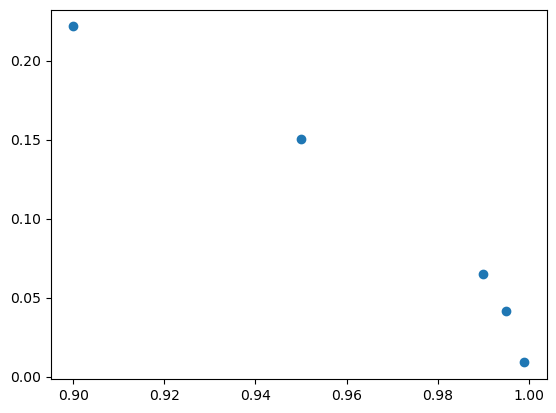

In [38]:
k1 = (('n_steps', 6),('s_churn',60))
k2 = (('n_steps', 160),('s_churn',60))
arr1 = rho_per_rhodata_10cl[k1]
arr2 = rho_per_rhodata_10cl[k2]
diff = arr2 - arr1
plt.plot(rho_list_10cl[-plot_last:], diff[-plot_last:], 'o')
plt.show()

## Now for the experiment with no digit

### Deterministic sampling

In [ ]:
root_dir = ...
matrix_files = ...
run_names_no_digit = ...
rho_list_no_digit = [0.7,0.8,0.9,0.95,0.99,0.999]
run_dict_no_digit = {k:v for k,v in zip(rho_list_no_digit, run_names_no_digit)}
run_mat_no_digit = {get_nstep_schurn(mfile) : {rho:np.loadtxt(os.path.join(root_dir, dirname,mfile), delimiter=',') 
                for rho,dirname 
                in run_dict_no_digit.items()}
                for mfile in matrix_files}


In [40]:
rho_per_rhodata_no_digit = {}
rho_per_rhodata_conf_int_no_digit = {}
for k,mats in run_mat_no_digit.items():
    rho_per_rhodata_no_digit[k], rho_per_rhodata_conf_int_no_digit[k] = get_all_conf_int(mats, rho_list_no_digit, num_classes=10)

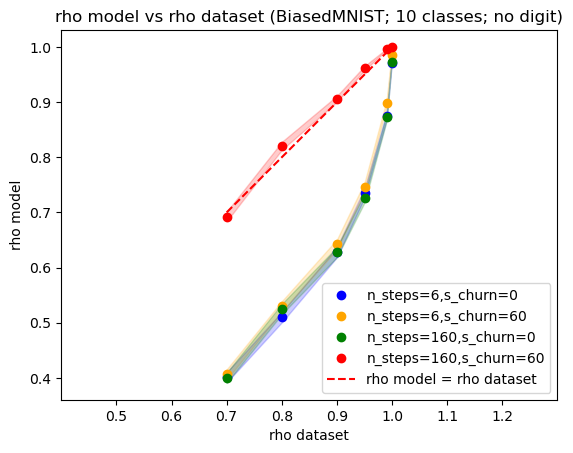

In [41]:
plot_last = len(rho_list_no_digit)
for (k, rhos), (_, conf_ints) in zip(rho_per_rhodata_no_digit.items(), rho_per_rhodata_conf_int_no_digit.items()):
    color = color_map[k]
    plt.fill_between(rho_list_no_digit[-plot_last:], conf_ints[:,0][-plot_last:], conf_ints[:,1][-plot_last:], alpha=0.2, color=color)
    plt.plot(rho_list_no_digit[-plot_last:], rhos[-plot_last:], 'o', color=color, label=repr_tuple(k))
plt.xlabel("rho dataset")
plt.ylabel("rho model")
X = np.linspace(min(rho_list_no_digit[-plot_last:]), 1.0, 100)
plt.plot(X, X, 'r--', label='rho model = rho dataset')
plt.axis('equal')
plt.legend()
plt.title("rho model vs rho dataset (BiasedMNIST; 10 classes; no digit)")
plt.show()

In [42]:
run_mat_no_digit[("n_steps",6),("s_churn",0)][0.99][:num_classes].sum()

10880.0

## Downsized model

In [ ]:
root_dir_downsized = ...
matrix_files = ...
run_names_downsized = ...
rho_list_downsized = [0.7,0.8,0.9,0.99,0.995,0.999]
run_dict_downsized = {k:v for k,v in zip(rho_list_downsized, run_names_downsized)}
run_mat_downsized = {get_nstep_schurn(mfile) : {rho:np.loadtxt(os.path.join(root_dir_downsized, dirname,mfile), delimiter=',') 
                for rho,dirname 
                in run_dict_downsized.items()}
                for mfile in matrix_files}

rho_per_rhodata_downsized = {}
rho_per_rhodata_conf_int_downsized = {}
for k,mats in run_mat_downsized.items():
    rho_per_rhodata_downsized[k], rho_per_rhodata_conf_int_downsized[k] = get_all_conf_int(mats, rho_list_downsized, num_classes=10)

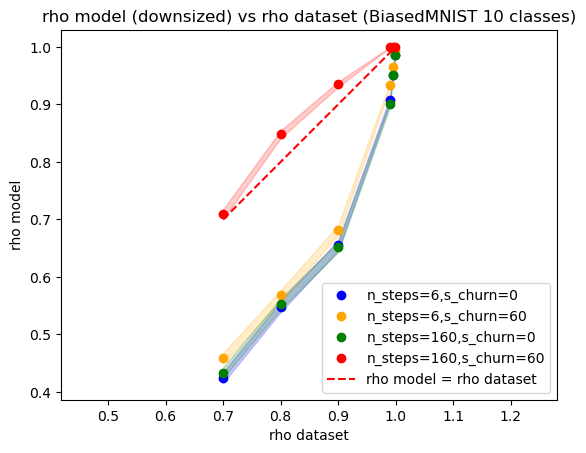

In [44]:
plot_last = len(rho_list_downsized)
for (k, rhos), (_, conf_ints) in zip(rho_per_rhodata_downsized.items(), rho_per_rhodata_conf_int_downsized.items()):
    color = color_map[k]
    plt.fill_between(rho_list_downsized[-plot_last:], conf_ints[:,0][-plot_last:], conf_ints[:,1][-plot_last:], alpha=0.2, color=color)
    plt.plot(rho_list_downsized[-plot_last:], rhos[-plot_last:], 'o', color=color, label=repr_tuple(k))
plt.xlabel("rho dataset")
plt.ylabel("rho model")
X = np.linspace(min(rho_list_downsized[-plot_last:]), 1.0, 100)
plt.plot(X, X, 'r--', label='rho model = rho dataset')
plt.axis('equal')
plt.legend()
plt.title("rho model (downsized) vs rho dataset (BiasedMNIST 10 classes)")
plt.show()

In [45]:
run_mat_downsized[(("n_steps", 6), ("s_churn", 0))][0.99][:num_classes].sum()

10880.0

## 2 classes only

In [ ]:
root_dir_2classes = ...
matrix_files = ...
run_names_2classes = ...
rho_list_2classes = [0.5,0.6,0.7,0.8,0.9,0.99,0.995,0.999]
run_dict_2classes = {k:v for k,v in zip(rho_list_2classes, run_names_2classes)}
run_mat_2classes = {get_nstep_schurn(mfile) : {rho:np.loadtxt(os.path.join(root_dir_2classes, dirname,mfile), delimiter=',') 
                for rho,dirname 
                in run_dict_2classes.items()}
                for mfile in matrix_files}

rho_per_rhodata_2cl = {}
rho_per_rhodata_conf_int_2cl = {}
for k,mats in run_mat_2classes.items():
    rho_per_rhodata_2cl[k], rho_per_rhodata_conf_int_2cl[k] = get_all_conf_int(mats, rho_list_2classes, num_classes=2)

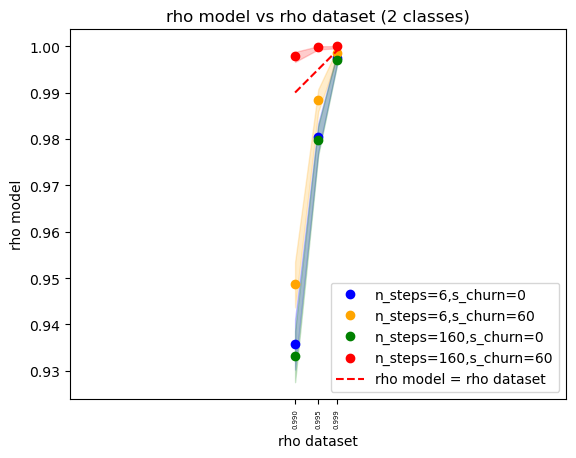

In [47]:
plot_last = 3
for (k, rhos), (_, conf_ints) in zip(rho_per_rhodata_2cl.items(), rho_per_rhodata_conf_int_2cl.items()):
    color = color_map[k]
    plt.fill_between(rho_list_2classes[-plot_last:], conf_ints[:,0][-plot_last:], conf_ints[:,1][-plot_last:], alpha=0.2, color=color)
    plt.plot(rho_list_2classes[-plot_last:], rhos[-plot_last:], 'o', color=color, label=repr_tuple(k))

plt.xlabel("rho dataset")
plt.ylabel("rho model")
X = np.linspace(min(rho_list_2classes[-plot_last:]), 1.0, 100)
plt.plot(X, X, 'r--', label='rho model = rho dataset')
plt.axis('equal')
plt.xticks(rho_list_2classes[-plot_last:], fontsize=5, rotation=90)
plt.legend()
plt.title("rho model vs rho dataset (2 classes)")
plt.show()

In [48]:
run_mat_2classes[(("n_steps", 6), ("s_churn", 0))][0.999][:2].sum()

8000.0

## 3 classes only

In [ ]:
root_dir_3classes = ...
matrix_files = ...
run_names_3classes = ...
rho_list_3classes = [0.33,0.4,0.5,0.6,0.7,0.8,0.9,0.95,0.99,0.995,0.999]
run_dict_3classes = {k:v for k,v in zip(rho_list_3classes, run_names_3classes)}

run_mat_3classes = {get_nstep_schurn(mfile) : {rho:np.loadtxt(os.path.join(root_dir_3classes, dirname,mfile), delimiter=',') 
                for rho,dirname 
                in run_dict_3classes.items()}
                for mfile in matrix_files}

rho_per_rhodata_3cl = {}
rho_per_rhodata_conf_int_3cl = {}
for k,mats in run_mat_3classes.items():
    rho_per_rhodata_3cl[k], rho_per_rhodata_conf_int_3cl[k] = get_all_conf_int(mats, rho_list_3classes, num_classes=3)

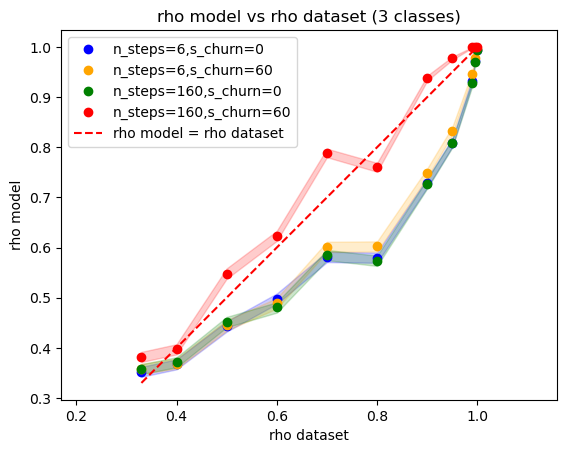

In [50]:
for (k, rhos), (_, conf_ints) in zip(rho_per_rhodata_3cl.items(), rho_per_rhodata_conf_int_3cl.items()):
    color = color_map[k]
    plt.fill_between(rho_list_3classes, conf_ints[:,0], conf_ints[:,1], alpha=0.2, color=color)
    plt.plot(rho_list_3classes, rhos, 'o', color=color, label=repr_tuple(k))
plt.xlabel("rho dataset")
plt.ylabel("rho model")
X = np.linspace(0.33, 1.0, 100)
plt.plot(X, X, 'r--', label='rho model = rho dataset')
plt.axis('equal')
plt.legend()
plt.title("rho model vs rho dataset (3 classes)")
plt.show()

In [51]:
run_mat_3classes[(("n_steps", 6), ("s_churn", 0))][0.999][:3].sum()

9000.0

## Both 10 classes dataset on the same plot

## 2 classes Small dataset

In [ ]:
root_dir_small_ds = ...
matrix_file_name_small_ds_det = ...
matrix_file_name_small_ds_stoch = ...
run_names_small_ds = ...
ds_sizes = [500, 1000, 2000, 3000, 4000, 5000, 6000,6332]
run_dict_small_ds = {k:v for k,v in zip(ds_sizes, run_names_small_ds)}
run_mat_small_ds_det = {ds_size:np.loadtxt(os.path.join(root_dir_small_ds, dirname,matrix_file_name_small_ds_det), delimiter=',') for ds_size,dirname in run_dict_small_ds.items()}
run_mat_small_ds_stoch = {ds_size:np.loadtxt(os.path.join(root_dir_small_ds, dirname,matrix_file_name_small_ds_stoch), delimiter=',') for ds_size,dirname in run_dict_small_ds.items()}

rho_per_rhodata_2cl_small_ds_det, rho_per_rhodata_conf_int_2cl_small_ds_det = get_all_conf_int(run_mat_small_ds_det, ds_sizes, num_classes=2)
rho_per_rhodata_2cl_small_ds_stoch, rho_per_rhodata_conf_int_2cl_small_ds_stoch = get_all_conf_int(run_mat_small_ds_stoch, ds_sizes, num_classes=2)

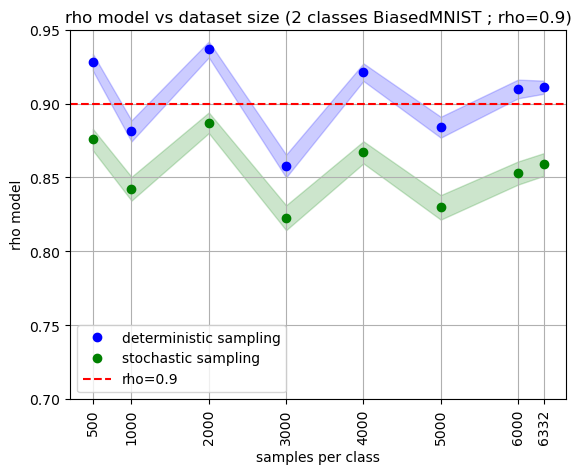

In [54]:
plt.fill_between(ds_sizes, rho_per_rhodata_conf_int_2cl_small_ds_det[:,0], rho_per_rhodata_conf_int_2cl_small_ds_det[:,1], alpha=0.2, color='blue')
plt.plot(ds_sizes, rho_per_rhodata_2cl_small_ds_det, 'o', color="blue", label="deterministic sampling")

plt.fill_between(ds_sizes, rho_per_rhodata_conf_int_2cl_small_ds_stoch[:,0], rho_per_rhodata_conf_int_2cl_small_ds_stoch[:,1], alpha=0.2, color='green')
plt.plot(ds_sizes, rho_per_rhodata_2cl_small_ds_stoch, 'o', color="green", label="stochastic sampling")

plt.xlabel("samples per class")
plt.axhline(y=0.9, color='r', linestyle='--', label="rho=0.9")
plt.ylabel("rho model")
plt.xticks(ds_sizes, rotation=90)
plt.ylim(0.7, 0.95)
plt.grid()
plt.title("rho model vs dataset size (2 classes BiasedMNIST ; rho=0.9)")
plt.legend()
plt.show()

## Deterministic sampling, varying number of integration steps

#### 2 classes, rho=0.9

In [ ]:
def get_nstep_use_heun(filename) :
    if isinstance(filename, list):
        return [get_nstep_use_heun(f) for f in filename]
    split_on_underscore = filename.split("_")
    return (
        ("n_steps", int(split_on_underscore[4].split("=")[1])),
        ("use_heun", split_on_underscore[6].split("=")[1].split(".")[0] == "True"),
    )
def access_by_nsteps(d, n, use_heun):
    for k in d.keys():
        if k[0][1] == n and k[1][1] == use_heun:
            return d[k]

root_dir_det_vs_num_step = ...

In [56]:
files = [f for f in os.listdir(root_dir_det_vs_num_step) if "nsteps" in f and "use_heun" in f and f.endswith(".csv")]
params_to_file_names = {get_nstep_use_heun(f):f for f in files}
all_nsteps = sorted(list(set([get_nstep_use_heun(f)[0][1] for f in files])))


In [ ]:
run_mat_heun_vs_num_steps = {n_steps : np.loadtxt(
    os.path.join(
        root_dir_det_vs_num_step,
        access_by_nsteps(params_to_file_names, n_steps, True)
        ),
        delimiter=','
    )
    for n_steps in all_nsteps
}
run_mat_euler_vs_num_steps = {n_steps : np.loadtxt(
    os.path.join(
        root_dir_det_vs_num_step,
        access_by_nsteps(params_to_file_names, n_steps, False)
        ),
        delimiter=','
    )
    for n_steps in all_nsteps
}

In [58]:
rho_per_nsteps_heun, rho_conf_ints_per_nsteps_heun = get_all_conf_int(run_mat_heun_vs_num_steps, all_nsteps, num_classes=2)
rho_per_nsteps_euler, rho_conf_ints_per_nsteps_euler = get_all_conf_int(run_mat_euler_vs_num_steps, all_nsteps, num_classes=2)

rho model vs number of steps (2 classes BiasedMNIST ; rho_dataset=0.9)


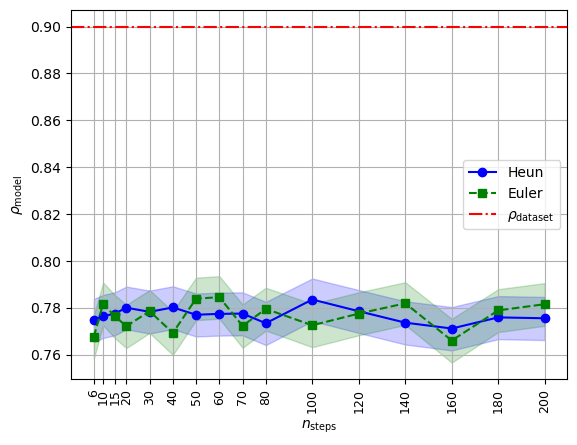

In [ ]:
plt.fill_between(all_nsteps, rho_conf_ints_per_nsteps_heun[:,0], rho_conf_ints_per_nsteps_heun[:,1], alpha=0.2, color='blue')
plt.plot(all_nsteps, rho_per_nsteps_heun, 'o-', color="blue", label="Heun")

plt.fill_between(all_nsteps, rho_conf_ints_per_nsteps_euler[:,0], rho_conf_ints_per_nsteps_euler[:,1], alpha=0.2, color='green')
plt.plot(all_nsteps, rho_per_nsteps_euler, 's--', color="green", label="Euler")

plt.xlabel(r"$n_\text{steps}$")
plt.axhline(y=0.9, color='r', linestyle='-.', label=r"$\rho_\text{dataset}$")
plt.ylabel(r"$\rho_\text{model}$")
plt.xticks(all_nsteps, rotation=90, fontsize=9)
plt.grid()
plt.legend()
print("rho model vs number of steps (2 classes BiasedMNIST ; rho_dataset=0.9)")
plt.savefig(..., format='pdf', bbox_inches='tight', dpi=300)
plt.show()

In [60]:
run_mat_euler_vs_num_steps[6][:2][:2].sum()

8000.0

#### 2 classes, rho=0.995

rho model vs number of steps (2 classes BiasedMNIST ; rho_dataset=0.995)


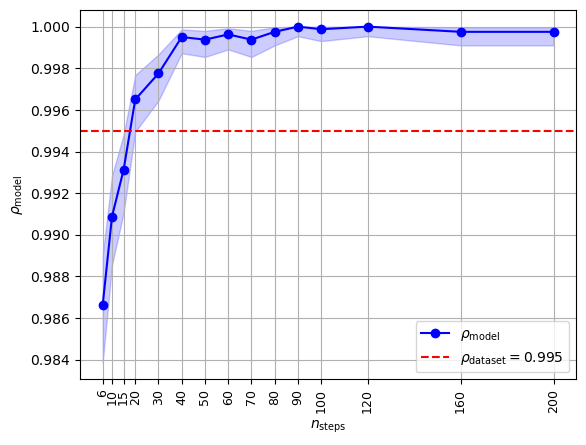

In [ ]:
root_dir_det_vs_num_step_0_995 = ...
files = [f for f in os.listdir(root_dir_det_vs_num_step_0_995) if "det" in f and "nsteps" in f and f.endswith(".csv")]
nsteps_to_file_names = {int(f.split("nsteps=")[1].split(".")[0]):f for f in files}
num_steps = sorted(nsteps_to_file_names.keys())
run_mat_det_vs_num_step = {nsteps:np.loadtxt(os.path.join(root_dir_det_vs_num_step_0_995, f), delimiter=',') for nsteps,f in nsteps_to_file_names.items()}
rho_per_rhodata_det_vs_num_step, rho_per_rhodata_conf_int_det_vs_num_step = get_all_conf_int(run_mat_det_vs_num_step, num_steps, num_classes=2)
plt.fill_between(num_steps, rho_per_rhodata_conf_int_det_vs_num_step[:,0], rho_per_rhodata_conf_int_det_vs_num_step[:,1], alpha=0.2, color='blue')
plt.plot(num_steps, rho_per_rhodata_det_vs_num_step, 'o-', color="blue", label=r"$\rho_\text{model}$")
plt.xlabel(r"$n_\text{steps}$")
plt.axhline(y=0.995, color='r', linestyle='--', label=r"$\rho_\text{dataset}=0.995$")
plt.ylabel(r"$\rho_\text{model}$")
plt.legend()
plt.xticks(num_steps, rotation=90, fontsize=9)
plt.grid()
print("rho model vs number of steps (2 classes BiasedMNIST ; rho_dataset=0.995)")
plt.savefig(..., bbox_inches='tight', dpi=300, format='pdf')
plt.show()

In [62]:
rho_per_rhodata_det_vs_num_step.max() - rho_per_rhodata_det_vs_num_step.min()

0.013375000000000026

In [63]:
run_mat_det_vs_num_step[10][:2,:2].sum()

8000.0

## 10 classes, rho=0.7

rho model vs number of steps (10 classes BiasedMNIST ; rho_dataset=0.7)


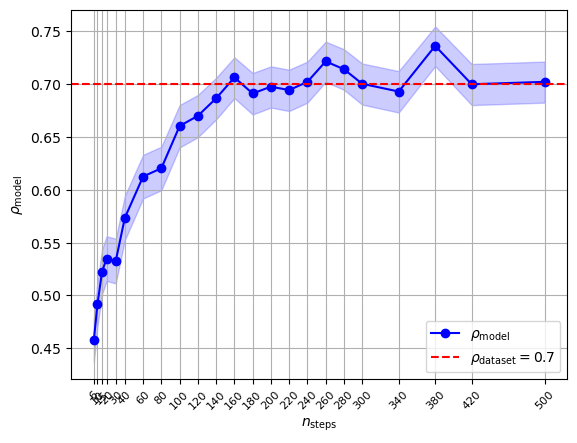

In [ ]:
root_dir_10cl_rho0_7 = ...
files = [f for f in os.listdir(root_dir_10cl_rho0_7) if "s_churn=60" in f and "nsteps" in f and f.endswith(".csv")]
nsteps_to_file_names = {int(f.split("nsteps=")[1].split("_")[0]):f for f in files}
num_steps = sorted(nsteps_to_file_names.keys())
run_mat_10cl_rho0_7 = {nsteps:np.loadtxt(os.path.join(root_dir_10cl_rho0_7, f), delimiter=',') for nsteps,f in nsteps_to_file_names.items()}
rho_per_rhodata_10cl_rho0_7, rho_per_rhodata_conf_int_10cl_rho0_7 = get_all_conf_int(run_mat_10cl_rho0_7, num_steps, num_classes=2)
plt.fill_between(num_steps, rho_per_rhodata_conf_int_10cl_rho0_7[:,0], rho_per_rhodata_conf_int_10cl_rho0_7[:,1], alpha=0.2, color='blue')
plt.plot(num_steps, rho_per_rhodata_10cl_rho0_7, 'o-', color="blue", label=r"$\rho_\text{model}$")
plt.xlabel(r"$n_\text{steps}$")
plt.axhline(y=0.7, color='r', linestyle='--', label=r"$\rho_\text{dataset}=0.7$")
plt.ylabel(r"$\rho_\text{model}$")
plt.xticks(num_steps, rotation=45, fontsize=8)
plt.legend(loc='lower right')
plt.grid()
print("rho model vs number of steps (10 classes BiasedMNIST ; rho_dataset=0.7)")
plt.savefig(..., bbox_inches='tight', format="pdf", dpi=300)
plt.show()

In [65]:
run_mat_10cl_rho0_7[10][:10,:10].sum()

10880.0

In [66]:
rho_per_rhodata_10cl_rho0_7.min(), rho_per_rhodata_10cl_rho0_7.max()

(0.4577205882352941, 0.7362132352941176)